# BNIRL Algorithm

Reproduce the results of Michini's BNIRL algorithm on simple dataset.

In [3]:
%matplotlib inline

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import learning

In [33]:
matplotlib.style.use('mitch-exp')

In [18]:
data = np.array([(0, y) for y in range(20)] + 
                [(x, 20) for x in range(20)] +
                [(20, y) for y in range(20)[::-1]] +
                [(x, 0) for x in range(20)[::-1]])
data

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       [ 0,  3],
       [ 0,  4],
       [ 0,  5],
       [ 0,  6],
       [ 0,  7],
       [ 0,  8],
       [ 0,  9],
       [ 0, 10],
       [ 0, 11],
       [ 0, 12],
       [ 0, 13],
       [ 0, 14],
       [ 0, 15],
       [ 0, 16],
       [ 0, 17],
       [ 0, 18],
       [ 0, 19],
       [ 0, 20],
       [ 1, 20],
       [ 2, 20],
       [ 3, 20],
       [ 4, 20],
       [ 5, 20],
       [ 6, 20],
       [ 7, 20],
       [ 8, 20],
       [ 9, 20],
       [10, 20],
       [11, 20],
       [12, 20],
       [13, 20],
       [14, 20],
       [15, 20],
       [16, 20],
       [17, 20],
       [18, 20],
       [19, 20],
       [20, 19],
       [20, 18],
       [20, 17],
       [20, 16],
       [20, 15],
       [20, 14],
       [20, 13],
       [20, 12],
       [20, 11],
       [20, 10],
       [20,  9],
       [20,  8],
       [20,  7],
       [20,  6],
       [20,  5],
       [20,  4],
       [20,  3],
       [20,  2],
       [20,  1

In [21]:
noisy_data = data + np.random.randn(*data.shape)/4

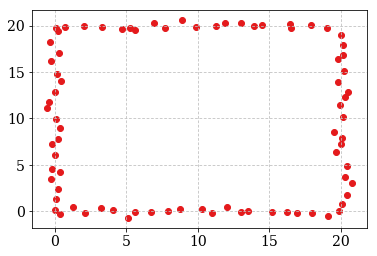

In [34]:
plt.scatter(noisy_data[:, 0], noisy_data[:, 1])

In [39]:
actions = np.diff(noisy_data, axis=0)
actions.shape

(79, 2)

In [40]:
noisy_data.shape

(80, 2)

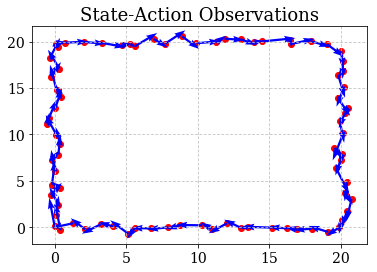

In [35]:
fig = plt.figure()
args = np.split(noisy_data, 2, axis=1) + np.split(actions, 2, axis=1)
plt.title('State-Action Observations')

plt.scatter(*np.split(noisy_data, 2, axis=1), c='r')
plt.quiver(*args, color='b')

## BNIRL Segmentation

Use BNIRL to discover subgoals.

In [37]:
from jupyter_extras import log_progress

In [42]:
noisy_data_trim = noisy_data[:-1]
noisy_data_trim.shape

(79, 2)

In [65]:
# Initialize the subgoal partition labels all to zero, and size to track convergence
partitions = [0]*(len(noisy_data_trim))
iters = 100
partition_dist = np.zeros((iters, len(noisy_data_trim)))
size = np.zeros((iters))

# Run BNIRL for _ iterations # eta works around 0.0000001
for i in log_progress(range(iters)):
    partitions = learning.bnirl_sampling_3(noisy_data_trim, partitions, actions, verbose=False, eta=0.0000001)
    partition_dist[i] = np.array(partitions)
    size[i] = (len(set(partitions)))

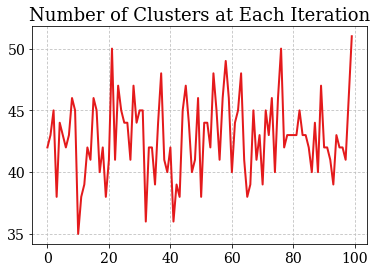

In [66]:
# Not too useful...
plt.figure()
plt.plot(size)
plt.title('Number of Clusters at Each Iteration')

In [67]:
from scipy import stats

In [68]:
modes = np.zeros(partition_dist.shape)
# modes = np.zeros(len(states_condense))
brn = 0

# Store mode for each state over Gibbs sample sweeps up to ith iteration
for j in range(len(partition_dist)): # 0-200
    for i in range(partition_dist.shape[1]): # 0-161
        modes[j, i] = stats.mode(partition_dist[:j+1, i])[0][0]

# for i, gibbs_samples in enumerate(partition_dist[brn:].T):
#     modes[i], _ = stats.mode(gibbs_samples)

mode_set = set([int(mode) for mode in modes[-1]])
counts = [(mode, np.count_nonzero(modes[-1]==mode)) for mode in mode_set]
sorted(counts, key=lambda x: x[1])[::-1]

[(42, 6),
 (20, 6),
 (36, 4),
 (34, 4),
 (43, 3),
 (40, 3),
 (38, 3),
 (35, 3),
 (30, 3),
 (25, 3),
 (59, 2),
 (39, 2),
 (37, 2),
 (32, 2),
 (24, 2),
 (23, 2),
 (19, 2),
 (9, 2),
 (8, 2),
 (3, 2),
 (69, 1),
 (65, 1),
 (61, 1),
 (60, 1),
 (57, 1),
 (56, 1),
 (55, 1),
 (54, 1),
 (51, 1),
 (45, 1),
 (44, 1),
 (41, 1),
 (33, 1),
 (29, 1),
 (26, 1),
 (14, 1),
 (13, 1),
 (12, 1),
 (11, 1),
 (7, 1),
 (1, 1)]

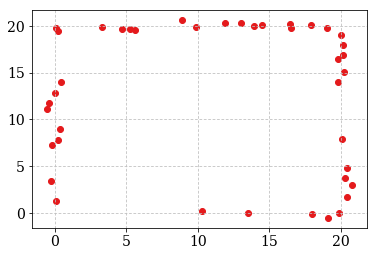

In [69]:
plt.scatter(*np.split(noisy_data_trim[list(mode_set)], 2, axis=1))